#### **Circle Packing Chart**
for lda topics       
based on: [this circular-packing tutorial](https://www.python-graph-gallery.com/circular-packing/)

In [75]:
import pymongo
from pymongo import MongoClient
import os
client = MongoClient()

In [76]:
#list Db's in mongo
client = MongoClient('localhost', 27017)
for database in client.list_databases():
    print(database)

{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False}
{'name': 'arxiv_LDA_DEFAULT', 'sizeOnDisk': 1187840, 'empty': False}
{'name': 'arxiv_LDA_arxiv_LDA_rm_20_novo', 'sizeOnDisk': 860160, 'empty': False}
{'name': 'arxiv_LDA_removed', 'sizeOnDisk': 983040, 'empty': False}
{'name': 'arxiv_LDA_rm_20t', 'sizeOnDisk': 831488, 'empty': False}
{'name': 'arxiv_LDA_test2_db', 'sizeOnDisk': 1085440, 'empty': False}
{'name': 'config', 'sizeOnDisk': 118784, 'empty': False}
{'name': 'lda_arxiv_log', 'sizeOnDisk': 73728, 'empty': False}
{'name': 'local', 'sizeOnDisk': 73728, 'empty': False}
{'name': 'test_database', 'sizeOnDisk': 135168, 'empty': False}
{'name': 'to_do_db', 'sizeOnDisk': 8192, 'empty': False}


In [77]:
db_name = 'arxiv_LDA_arxiv_LDA_rm_20_novo'

In [78]:
db = client[db_name]

In [79]:
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'arxiv_LDA_arxiv_LDA_rm_20_novo')


In [80]:
db.list_collection_names()

['topics', 'phrases']

In [81]:
topics = db['topics']

In [82]:
words_t0 = list(topics.find())[0]["word_probabilities"]

In [83]:
threshold = 0.005

In [84]:
import pandas as pd
df = pd.DataFrame(words_t0[:(next(x[0] for x in enumerate(words_t0) if x[1]["prob"] < threshold))])

In [85]:
print(df)

            word     prob
0        systems  0.04139
1    information  0.02866
2      cognitive  0.02786
3      knowledge  0.02707
4        science  0.02547
5       computer  0.02547
6    integration  0.01911
7      computing  0.01831
8   applications  0.01672
9             sp  0.01433
10      research  0.01354
11         human  0.01274
12        nature  0.01195
13  intelligence  0.01195
14   computation  0.01115
15         model  0.01035
16        series  0.00956
17      provides  0.00956
18       aspects  0.00876
19     cognition  0.00876
20         basis  0.00876
21        theory  0.00797
22     practical  0.00797
23      concepts  0.00797
24     institute  0.00797
25  capabilities  0.00797
26     behaviour  0.00717
27        issues  0.00717
28   development  0.00717
29         legal  0.00717
30         ideas  0.00717
31   theoretical  0.00637
32        either  0.00637
33            th  0.00637
34        indeed  0.00637
35         press  0.00637
36    conference  0.00637
37          

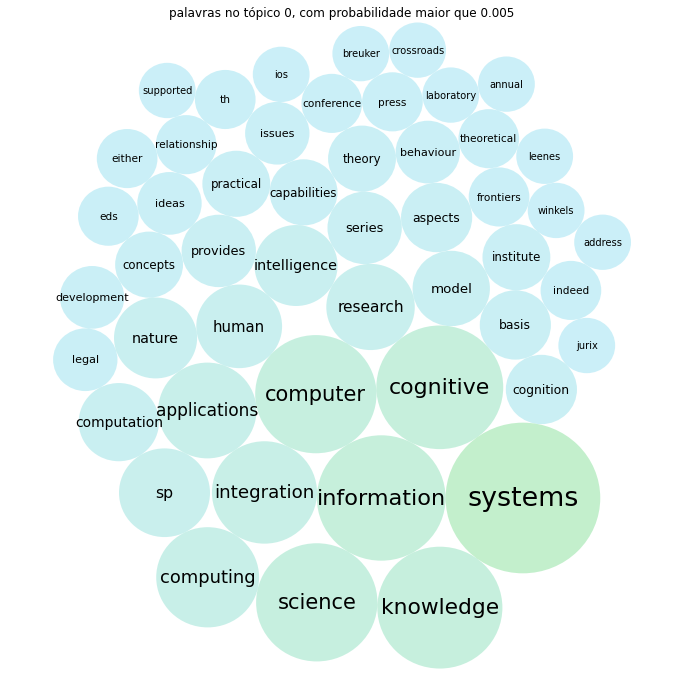

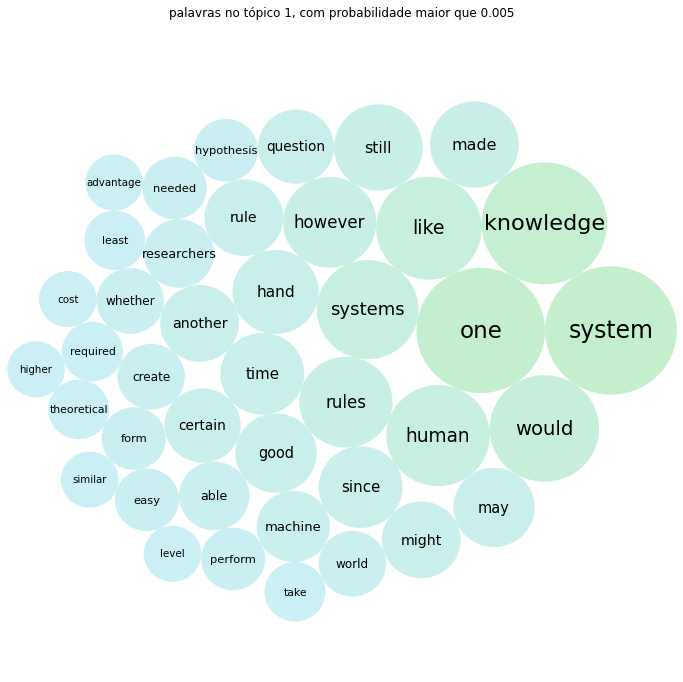

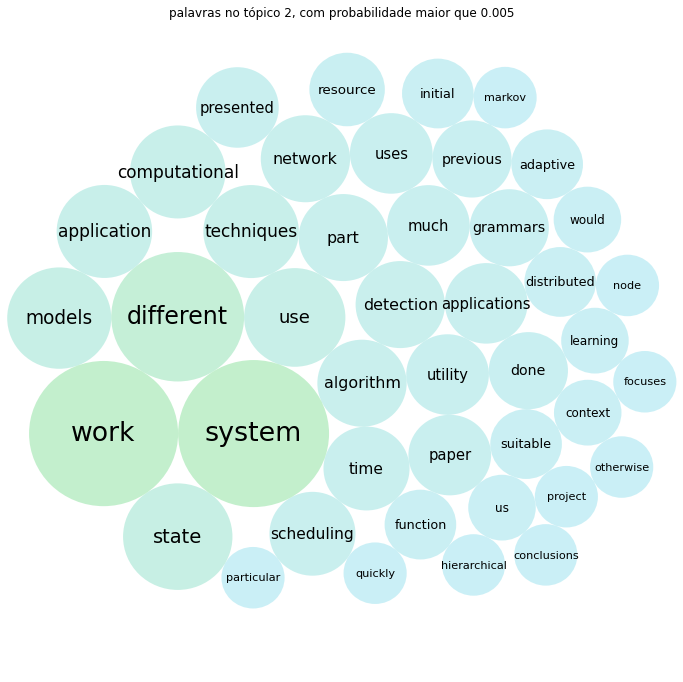

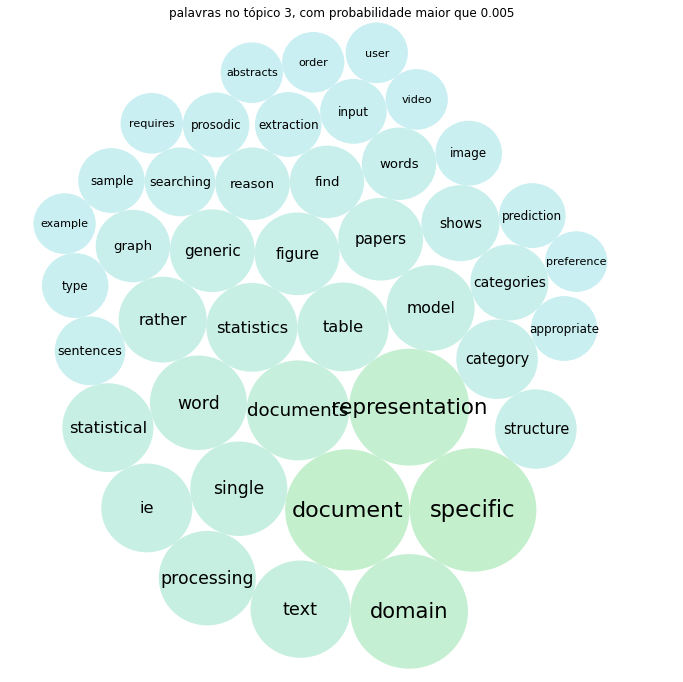

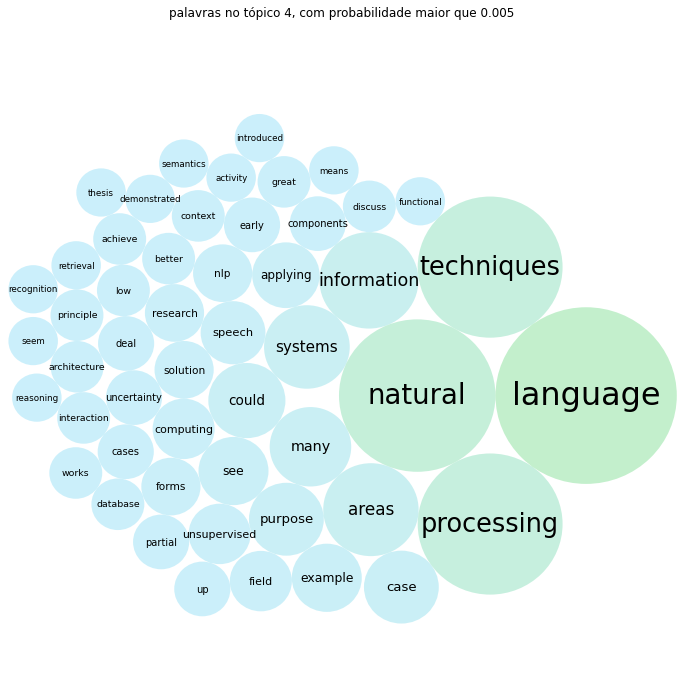

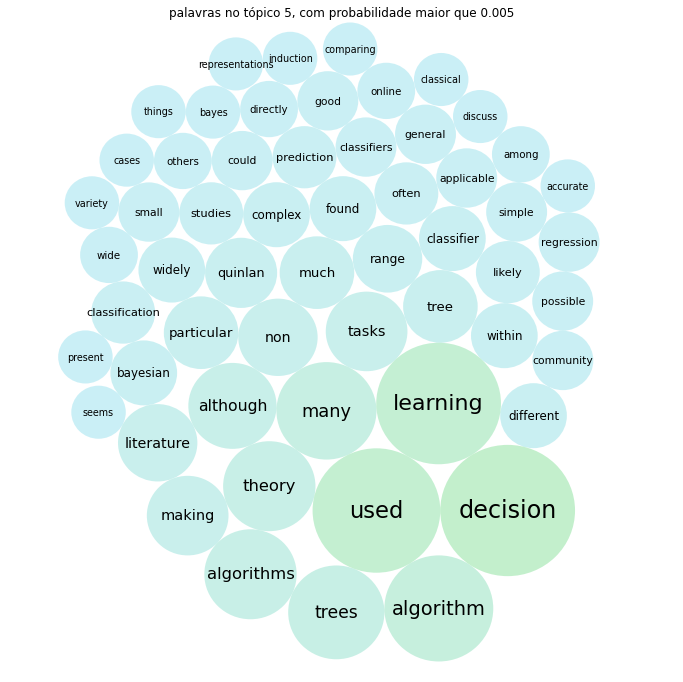

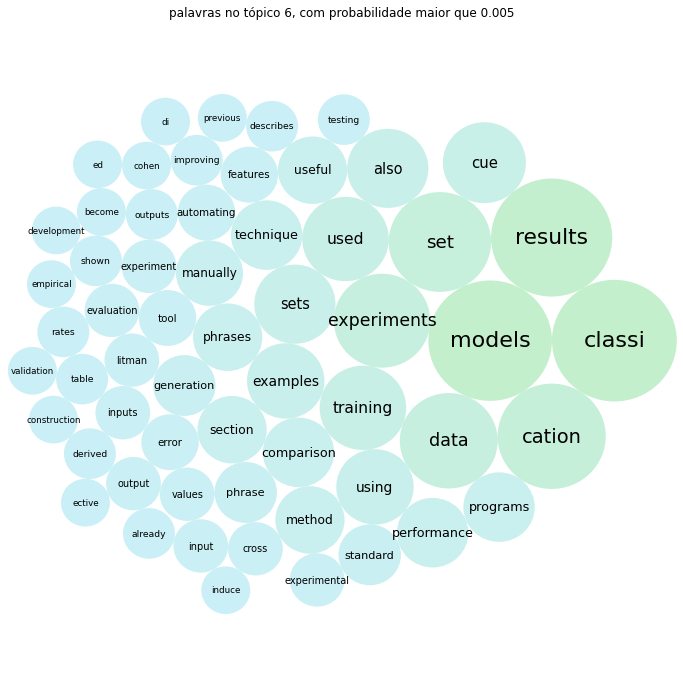

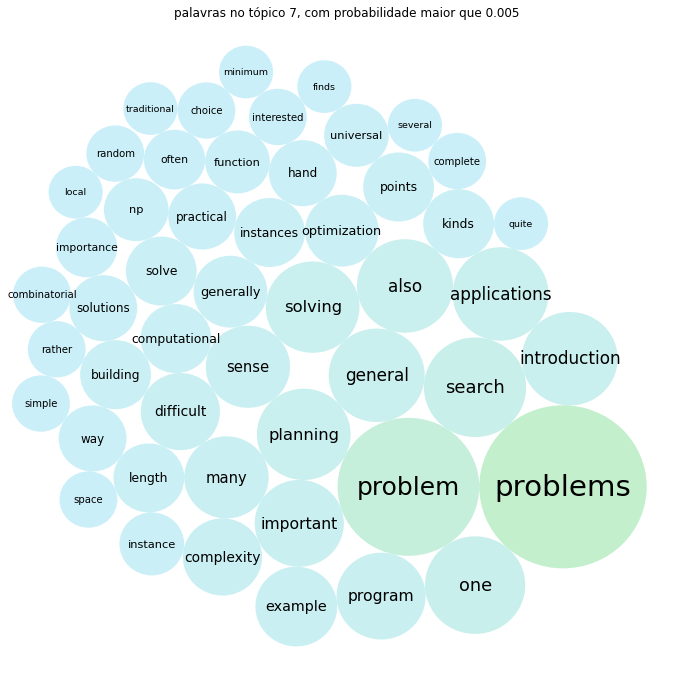

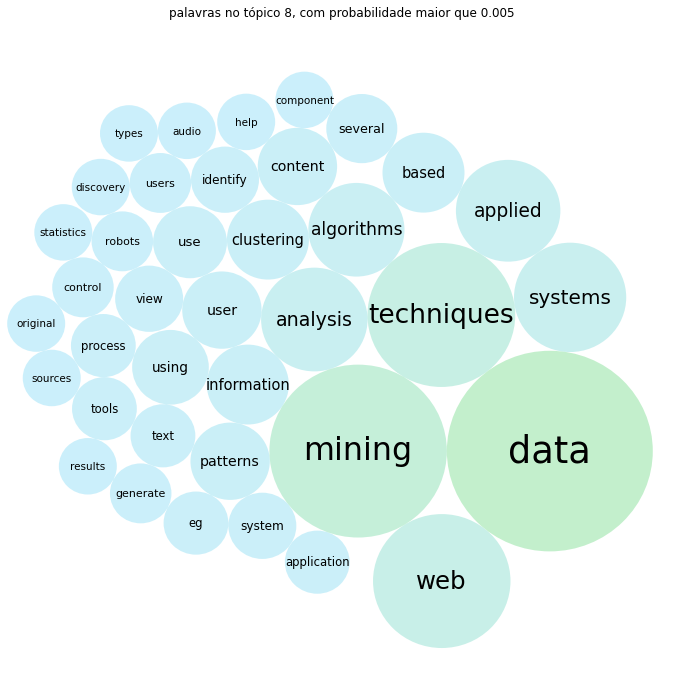

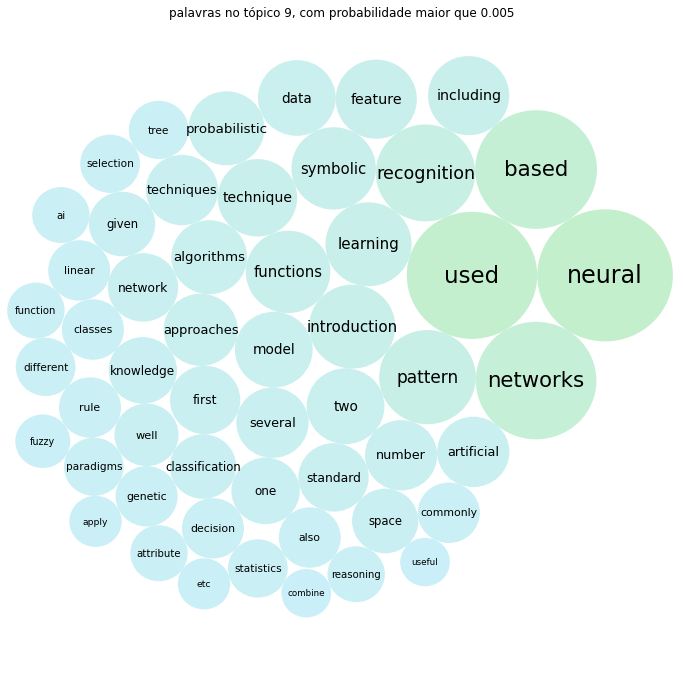

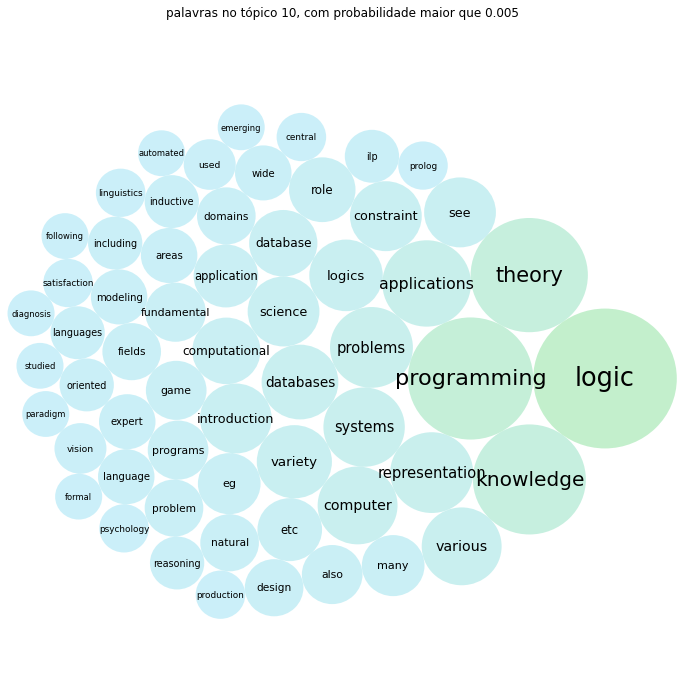

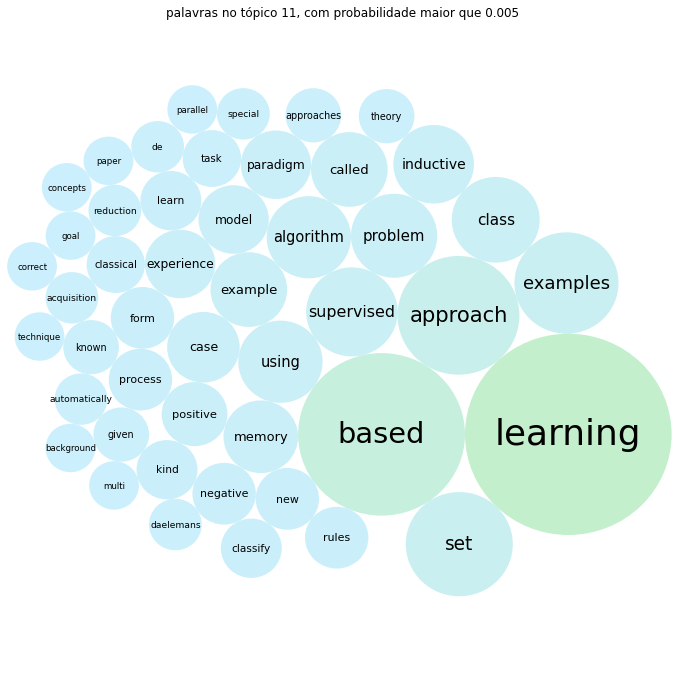

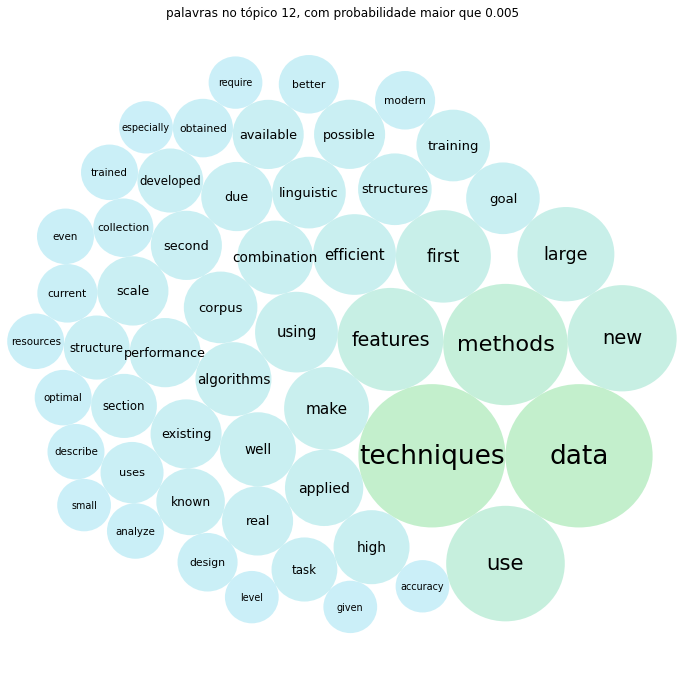

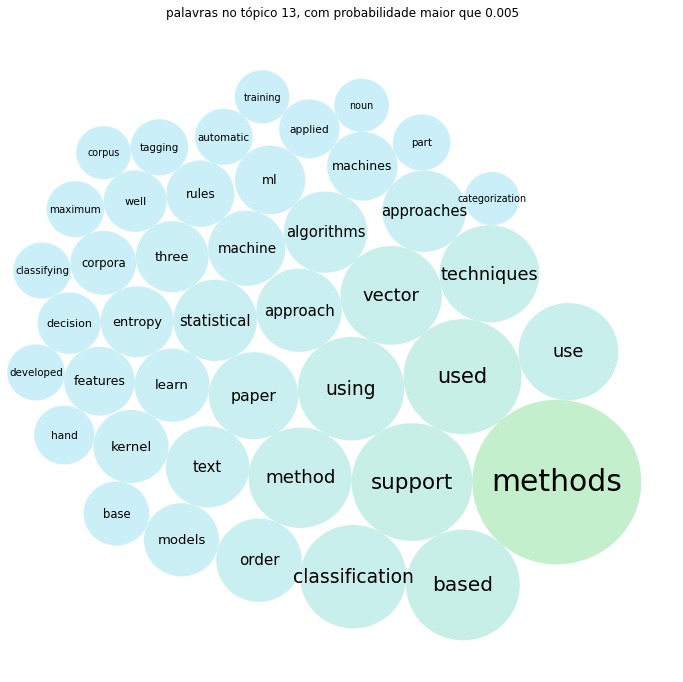

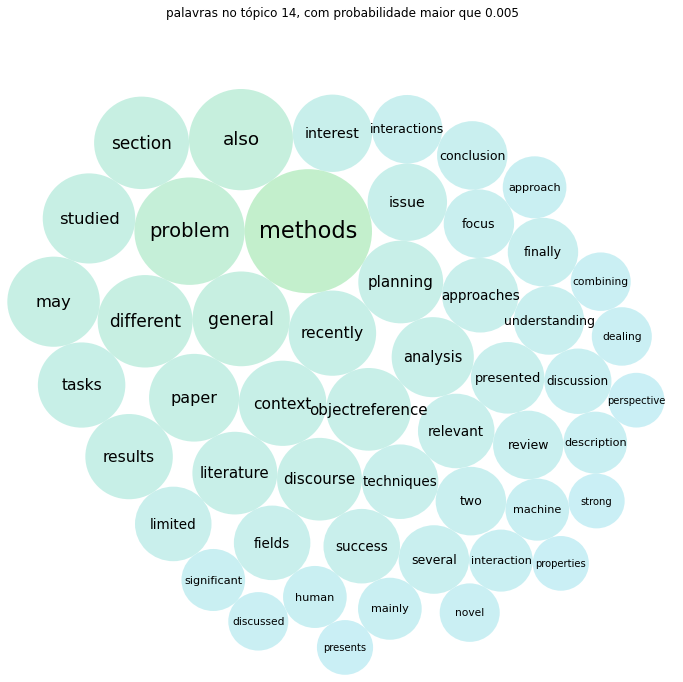

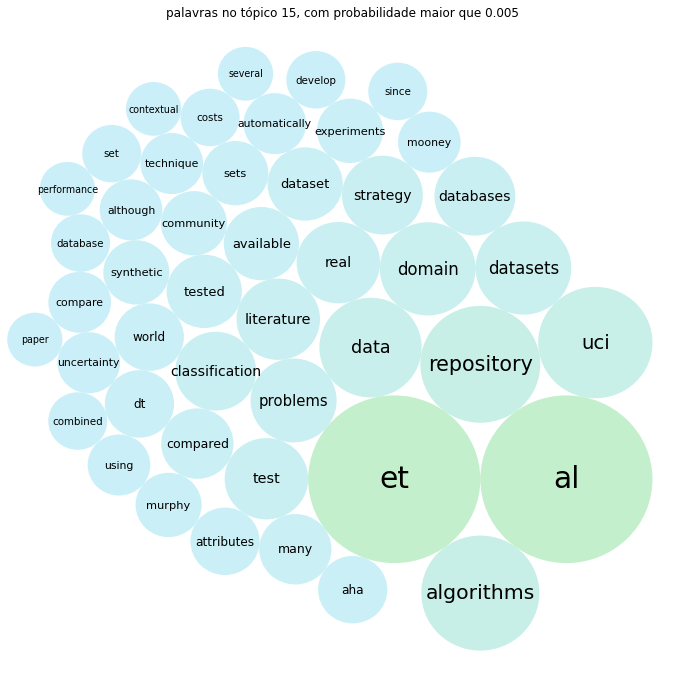

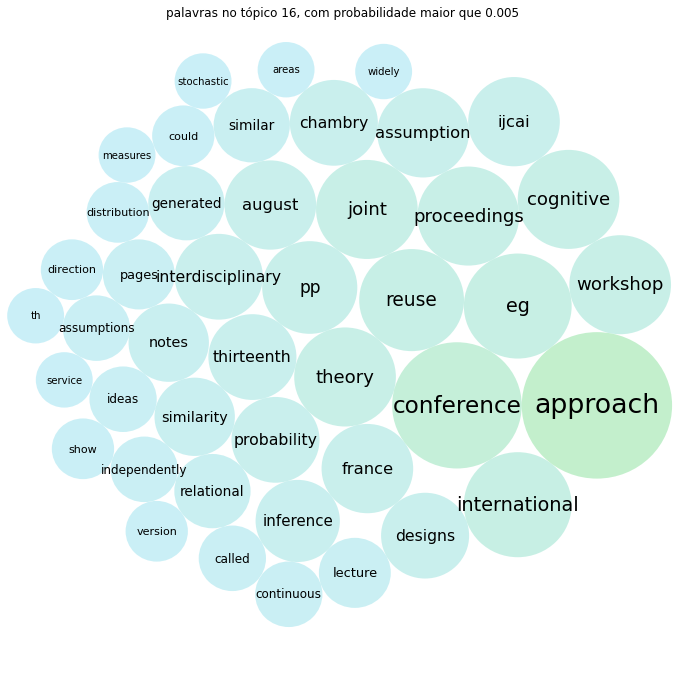

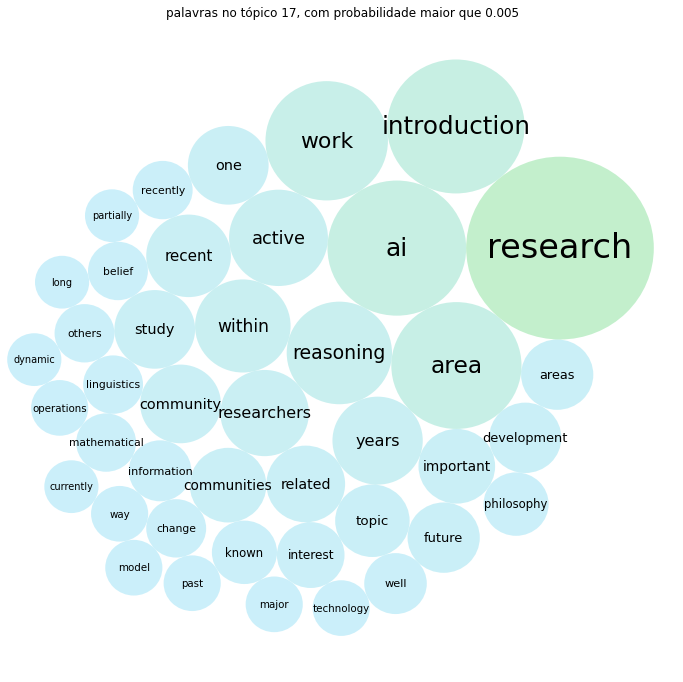

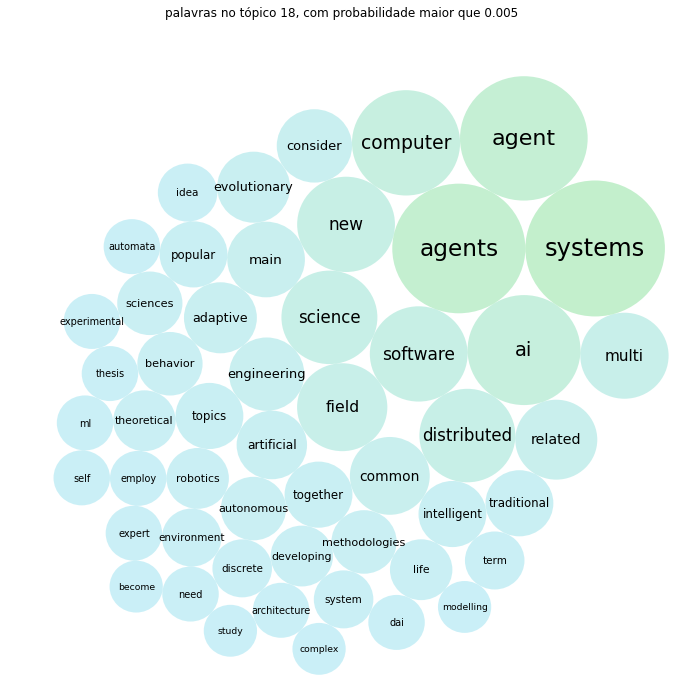

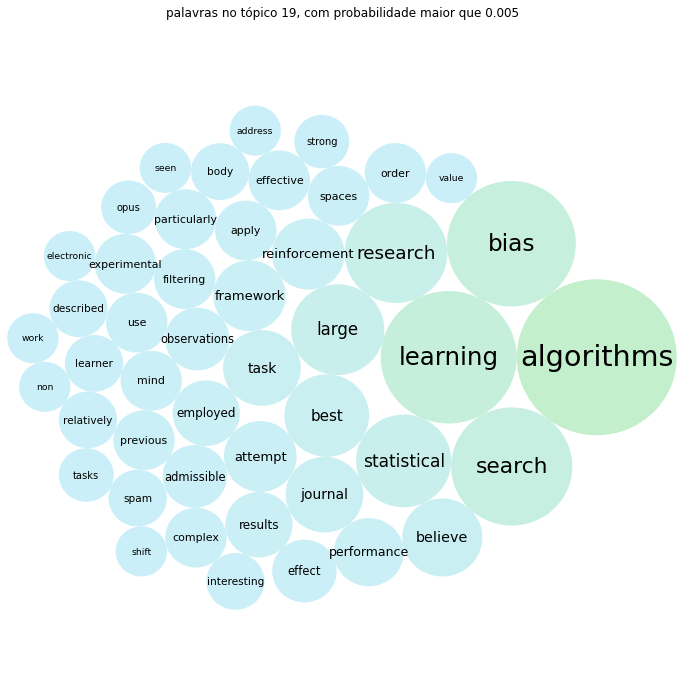

In [87]:
threshold = 0.005
for t,topic in enumerate(list(topics.find())):
    
    words_t = topic["word_probabilities"]
    df = pd.DataFrame(words_t[:(next(x[0] for x in enumerate(words_t) if x[1]["prob"] < threshold))])

    # import the circlify library
    import circlify

    # compute circle positions:
    circles = circlify.circlify(
        df['prob'].tolist(), 
        show_enclosure=False, 
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )

    # import libraries
    import matplotlib.pyplot as plt

    # Create just a figure and only one subplot
    fig, ax = plt.subplots(figsize=(12,12))

    # Title
    ax.set_title("palavras no tópico {}, com probabilidade maior que {}".format(t,threshold))

    # Remove axes
    ax.axis('off')

    # Find axis boundaries
    lim = max(
        max(
            abs(circle.x) + circle.r,
            abs(circle.y) + circle.r,
        )
        for circle in circles
    )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    # list of labels
    labels = df[::-1]['word']
    probs = df[::-1]['prob']

    max_prob = max(df['prob'])
    newpath="topic_images/circle_packings/{}/".format(db_name)
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    # print circles
    for circle, label, prob in zip(circles, labels, probs):
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r ,alpha=(0.4),color=((0.5-((prob/max_prob)/12)),0.85, (1-((prob/max_prob))/2)), linewidth=0))
        plt.annotate(
            label, 
            (x,y ) ,
            va='center',
            ha='center',
            fontsize=120*r
         )
    plt.savefig("{}_words_in_topic_{}.png".format(newpath,t))